### Cleaning and preparing the data for model training

Problem statement: to predict purchase capacity amount of customer against various products to help them create personalised offer for customer against different products

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import math
pd.options.display.max_columns= None
pd.options.display.max_rows = None
pd.options.display.float_format = "{:0.2f}".format
%matplotlib inline

In [34]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")
data_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.00,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.00,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.00,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.00,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.00,12.00


In [35]:
##merge same columns data we can use (append , concat)
df = data_train.append(data_test)
#data= pd.concat([data_test,data_train])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.00
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.00,14.00,15200.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.00
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.00,NaN,1057.00
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [37]:
df = df.iloc[::6]

In [38]:
df.shape

(130612, 12)

In [39]:
df.drop(["User_ID"],axis = 1,inplace=True)

In [40]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.00
6,P00184942,M,46-50,7,B,2,1,1,8.00,17.00,19215.00
12,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073.00
18,P00036842,M,36-45,1,B,1,1,1,14.00,16.00,11788.00
24,P00303442,M,26-35,12,C,4+,1,1,8.00,14.00,11927.00


In [41]:
## To convert catagorical variable 
# df["Gender"]=df["Gender"].map({"F":0,"M":1})
df["Gender"]=pd.get_dummies(df["Gender"],drop_first=True)
# df.info()
from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.00
6,P00184942,1,46-50,7,B,2,1,1,8.00,17.00,19215.00
12,P00031342,1,26-35,20,A,1,1,8,NaN,NaN,6073.00
18,P00036842,1,36-45,1,B,1,1,1,14.00,16.00,11788.00
24,P00303442,1,26-35,12,C,4+,1,1,8.00,14.00,11927.00


In [43]:
## Catagorical variable age
df["Age"].value_counts()

26-35    52091
36-45    26197
18-25    23654
46-50    10883
51-55     9026
55+       5189
0-17      3572
Name: Age, dtype: int64

In [44]:
df["Age"] = df["Age"].map({"26-35":3,"36-45":4,"18-25":2,"46-50":5,"51-55":6,"55+":7,"0-17":1})

In [45]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.00
6,P00184942,1,5,7,B,2,1,1,8.00,17.00,19215.00
12,P00031342,1,3,20,A,1,1,8,NaN,NaN,6073.00
18,P00036842,1,4,1,B,1,1,1,14.00,16.00,11788.00
24,P00303442,1,3,12,C,4+,1,1,8.00,14.00,11927.00


In [46]:
df["City_Category"].value_counts()

B    54961
C    40631
A    35020
Name: City_Category, dtype: int64

In [47]:
## We can also use labels encoding method also
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df["Age"] = label_encoder.fit_transform(df["Age"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130612 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  130612 non-null  object 
 1   Gender                      130612 non-null  uint8  
 2   Age                         130612 non-null  int64  
 3   Occupation                  130612 non-null  int64  
 4   City_Category               130612 non-null  object 
 5   Stay_In_Current_City_Years  130612 non-null  object 
 6   Marital_Status              130612 non-null  int64  
 7   Product_Category_1          130612 non-null  int64  
 8   Product_Category_2          89613 non-null   float64
 9   Product_Category_3          39527 non-null   float64
 10  Purchase                    91678 non-null   float64
dtypes: float64(3), int64(4), object(3), uint8(1)
memory usage: 11.1+ MB


In [49]:
#catagorical variable dummies
df_city = pd.get_dummies(df["City_Category"],drop_first=True)
df_city.head()
df.describe()

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,130612.00,130612.00,130612.00,130612.00,130612.00,89613.00,39527.00,91678.00
mean,0.75,3.50,8.07,0.41,5.37,9.82,12.63,9227.95
std,0.43,1.35,6.52,0.49,3.87,5.09,4.14,5000.05
min,0.00,1.00,0.00,0.00,1.00,2.00,3.00,12.00
25%,1.00,3.00,2.00,0.00,1.00,5.00,9.00,5684.25
50%,1.00,3.00,7.00,0.00,5.00,9.00,14.00,8031.00
75%,1.00,4.00,14.00,1.00,8.00,15.00,16.00,12024.00
max,1.00,7.00,20.00,1.00,20.00,18.00,18.00,23958.00


In [50]:
df = pd.concat([df,df_city],axis = 1)
df.drop("City_Category",axis = 1,inplace =True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130612 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  130612 non-null  object 
 1   Gender                      130612 non-null  uint8  
 2   Age                         130612 non-null  int64  
 3   Occupation                  130612 non-null  int64  
 4   Stay_In_Current_City_Years  130612 non-null  object 
 5   Marital_Status              130612 non-null  int64  
 6   Product_Category_1          130612 non-null  int64  
 7   Product_Category_2          89613 non-null   float64
 8   Product_Category_3          39527 non-null   float64
 9   Purchase                    91678 non-null   float64
 10  B                           130612 non-null  uint8  
 11  C                           130612 non-null  uint8  
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 10.3+ MB


In [52]:
## Convert Stay_In_Current_City_Years (Categorical Varialbe)
# from sklearn.preprocessing import LabelEncoder
# encoding = LabelEncoder()
# df["Stay_In_Current_City_Years"] = encoding.fit_transform(df["Stay_In_Current_City_Years"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130612 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  130612 non-null  object 
 1   Gender                      130612 non-null  uint8  
 2   Age                         130612 non-null  int64  
 3   Occupation                  130612 non-null  int64  
 4   Stay_In_Current_City_Years  130612 non-null  object 
 5   Marital_Status              130612 non-null  int64  
 6   Product_Category_1          130612 non-null  int64  
 7   Product_Category_2          89613 non-null   float64
 8   Product_Category_3          39527 non-null   float64
 9   Purchase                    91678 non-null   float64
 10  B                           130612 non-null  uint8  
 11  C                           130612 non-null  uint8  
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 10.3+ MB


In [54]:
df["Product_ID"].head()

0     P00069042
6     P00184942
12    P00031342
18    P00036842
24    P00303442
Name: Product_ID, dtype: object

In [55]:
df.isnull().sum() 

Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            40999
Product_Category_3            91085
Purchase                      38934
B                                 0
C                                 0
dtype: int64

In [56]:
df["Product_Category_2"].unique() # Check waht should replacement value of null

array([nan,  8., 14., 11.,  4.,  9.,  2.,  5., 16.,  6., 17., 15., 13.,
       10., 18., 12.,  3.,  7.])

In [57]:
df["Product_Category_2"].value_counts()   

8.00     15347
14.00    13108
2.00     11695
16.00    10233
15.00     9034
5.00      6210
4.00      6182
6.00      3958
11.00     3273
17.00     3089
13.00     2445
9.00      1392
12.00     1329
3.00       759
10.00      741
18.00      691
7.00       127
Name: Product_Category_2, dtype: int64

In [58]:
##To replace null value by checking uunique 
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [59]:
df["Product_Category_2"].isnull().sum()

0

In [60]:
df["Product_Category_3"].unique()

array([nan, 17., 16., 14.,  9.,  5.,  6., 15., 10., 13.,  8., 12., 11.,
        3., 18.,  4.])

In [61]:
df["Product_Category_3"].head()

0      NaN
6    17.00
12     NaN
18   16.00
24   14.00
Name: Product_Category_3, dtype: float64

In [62]:
from numpy import nan
from sklearn.impute import SimpleImputer
SI = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df["Product_Category_3"] = SI.fit_transform(df[["Product_Category_3"]])

In [63]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.00,16.00,8370.00,0,0
6,P00184942,1,5,7,2,1,1,8.00,17.00,19215.00,1,0
12,P00031342,1,3,20,1,1,8,8.00,16.00,6073.00,0,0
18,P00036842,1,4,1,1,1,1,14.00,16.00,11788.00,1,0
24,P00303442,1,3,12,4+,1,1,8.00,14.00,11927.00,0,1


In [64]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '1', '4+', '3', '0'], dtype=object)

In [65]:
# df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace("4+","4")
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+","")
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.00,16.00,8370.00,0,0
6,P00184942,1,5,7,2,1,1,8.00,17.00,19215.00,1,0
12,P00031342,1,3,20,1,1,8,8.00,16.00,6073.00,0,0
18,P00036842,1,4,1,1,1,1,14.00,16.00,11788.00,1,0
24,P00303442,1,3,12,4,1,1,8.00,14.00,11927.00,0,1


In [66]:
##change data type
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype("int64")

In [67]:
df["Gender"]= df["Gender"].astype("int64")
df["B"]= df["B"].astype("int64")
df["C"]= df["C"].astype("int64")

In [68]:
# from sklearn.impute import KNNImputer
# impute = KNNImputer(missing_values=np.nan,n_neighbors=5)
# df["Purchase"] = impute.fit_transform(df[["Purchase"]])
df['Purchase']=df['Purchase'].fillna(df["Purchase"].mode())


In [69]:
df.drop("Product_ID",axis = 1,inplace = True)
df.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.00,-0.00,0.12,0.01,-0.01,-0.05,-0.02,-0.01,0.06,-0.01,0.00
Age,-0.00,1.00,0.09,-0.01,0.31,0.06,0.04,0.04,0.02,-0.02,0.11
Occupation,0.12,0.09,1.00,0.03,0.02,-0.01,-0.00,-0.01,0.02,-0.01,0.04
Stay_In_Current_City_Years,0.01,-0.01,0.03,1.00,-0.01,-0.00,-0.00,-0.00,0.01,0.01,0.01
Marital_Status,-0.01,0.31,0.02,-0.01,1.00,0.02,0.01,0.01,-0.00,-0.01,0.04
Product_Category_1,-0.05,0.06,-0.01,-0.00,0.02,1.00,0.29,0.32,-0.35,-0.00,-0.01
Product_Category_2,-0.02,0.04,-0.00,-0.00,0.01,0.29,1.00,0.46,-0.13,-0.00,-0.00
Product_Category_3,-0.01,0.04,-0.01,-0.00,0.01,0.32,0.46,1.00,-0.19,0.00,-0.02
Purchase,0.06,0.02,0.02,0.01,-0.00,-0.35,-0.13,-0.19,1.00,-0.02,0.06
B,-0.01,-0.02,-0.01,0.01,-0.01,-0.00,-0.00,0.00,-0.02,1.00,-0.57


In [70]:
df.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.00,-0.00,0.12,0.01,-0.01,-0.05,-0.02,-0.01,0.06,-0.01,0.00
Age,-0.00,1.00,0.09,-0.01,0.31,0.06,0.04,0.04,0.02,-0.02,0.11
Occupation,0.12,0.09,1.00,0.03,0.02,-0.01,-0.00,-0.01,0.02,-0.01,0.04
Stay_In_Current_City_Years,0.01,-0.01,0.03,1.00,-0.01,-0.00,-0.00,-0.00,0.01,0.01,0.01
Marital_Status,-0.01,0.31,0.02,-0.01,1.00,0.02,0.01,0.01,-0.00,-0.01,0.04
Product_Category_1,-0.05,0.06,-0.01,-0.00,0.02,1.00,0.29,0.32,-0.35,-0.00,-0.01
Product_Category_2,-0.02,0.04,-0.00,-0.00,0.01,0.29,1.00,0.46,-0.13,-0.00,-0.00
Product_Category_3,-0.01,0.04,-0.01,-0.00,0.01,0.32,0.46,1.00,-0.19,0.00,-0.02
Purchase,0.06,0.02,0.02,0.01,-0.00,-0.35,-0.13,-0.19,1.00,-0.02,0.06
B,-0.01,-0.02,-0.01,0.01,-0.01,-0.00,-0.00,0.00,-0.02,1.00,-0.57


ValueError: cannot reindex on an axis with duplicate labels

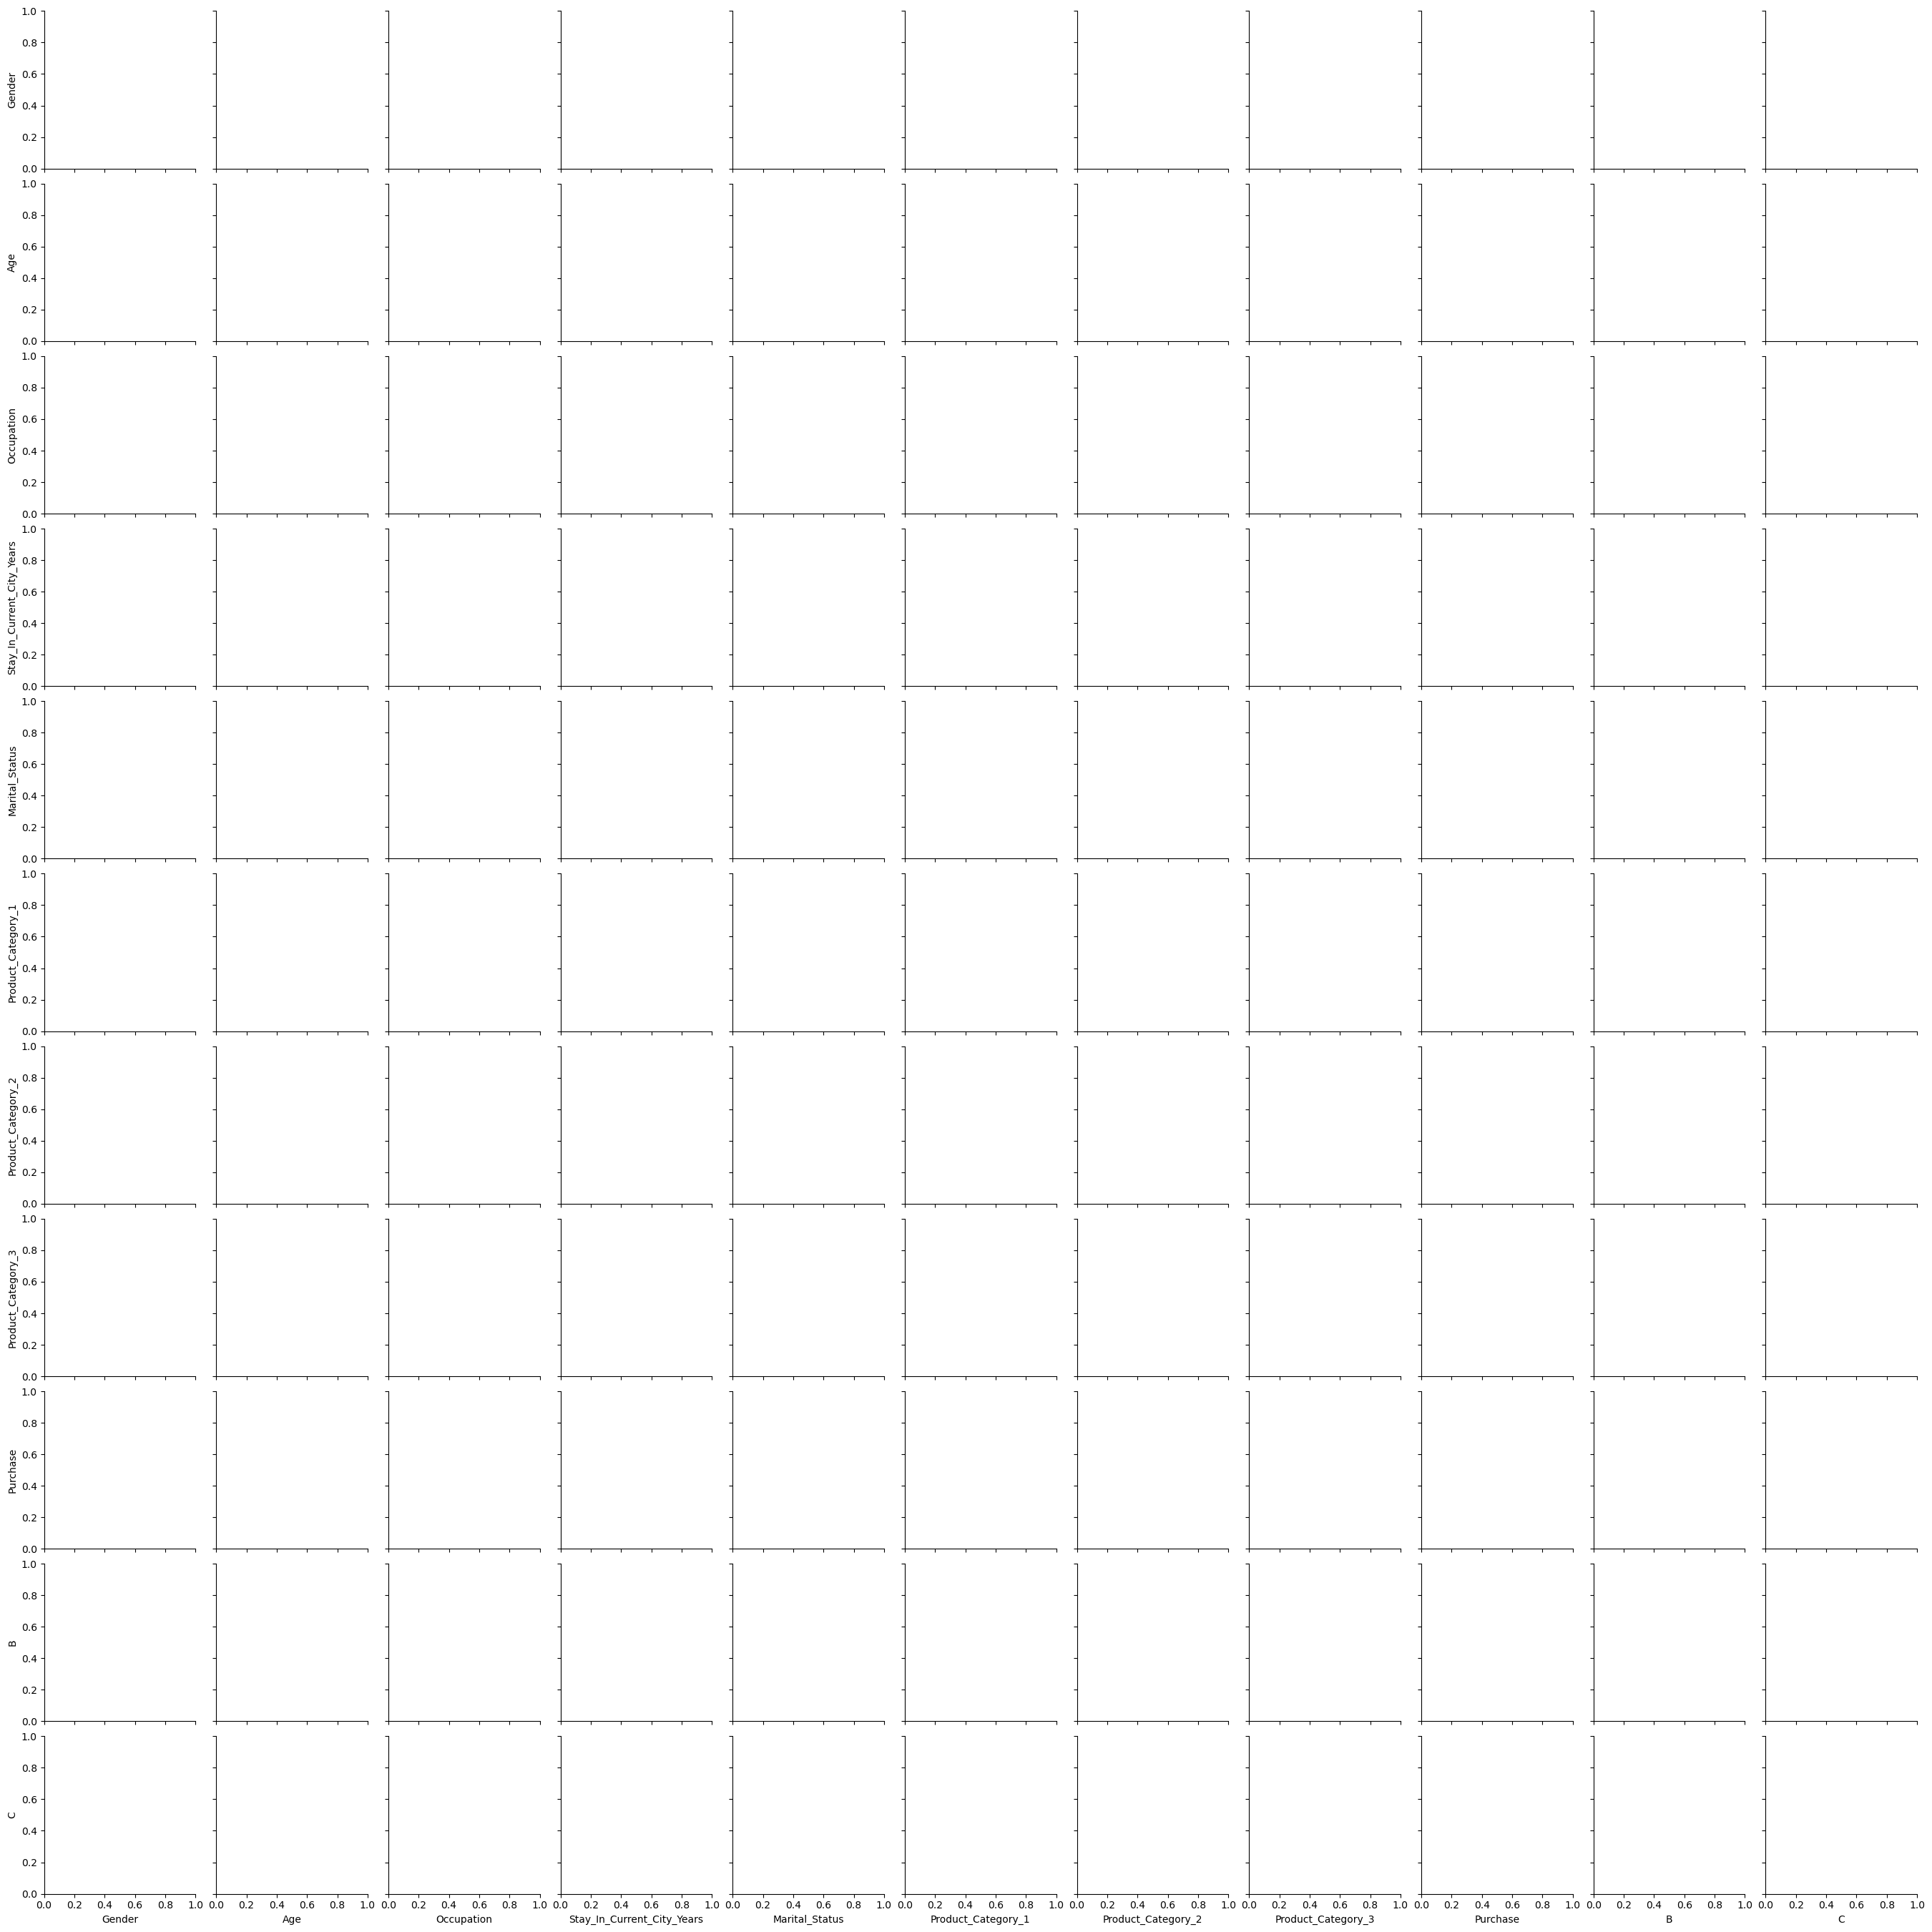

In [78]:
## Visulazation
sns.pairplot(df[:]);

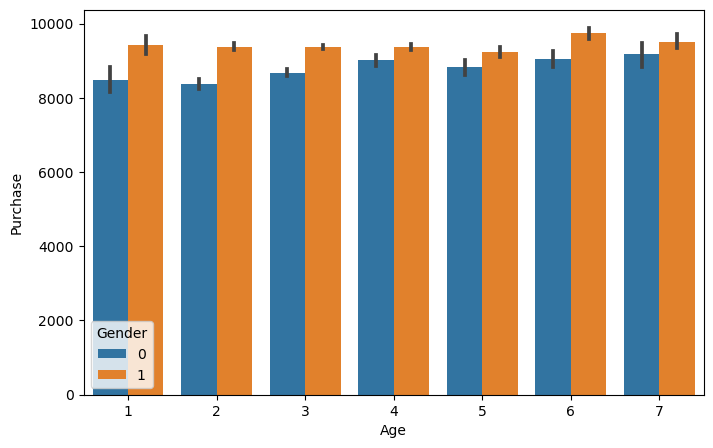

In [75]:
#visulization of age versas purchase with Gender
plt.figure(figsize=(8,5))
sns.barplot(x = df['Age'],y = df["Purchase"],hue =df["Gender"]);

##### Observation  
Purchasing of men is high then woment


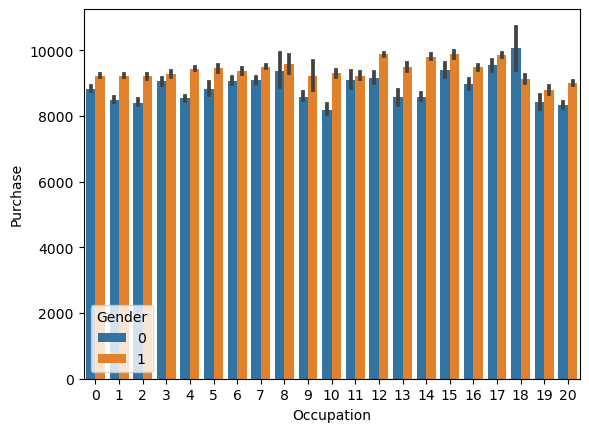

In [46]:
sns.barplot(x = df['Occupation'],y = df["Purchase"],hue =df["Gender"]);

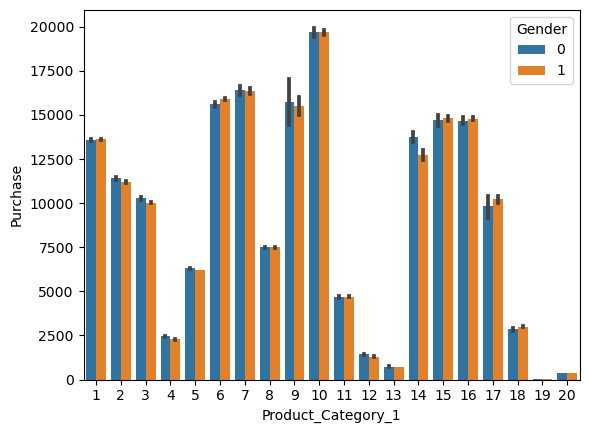

In [47]:
sns.barplot(x = df['Product_Category_1'],y = df["Purchase"],hue =df["Gender"]);

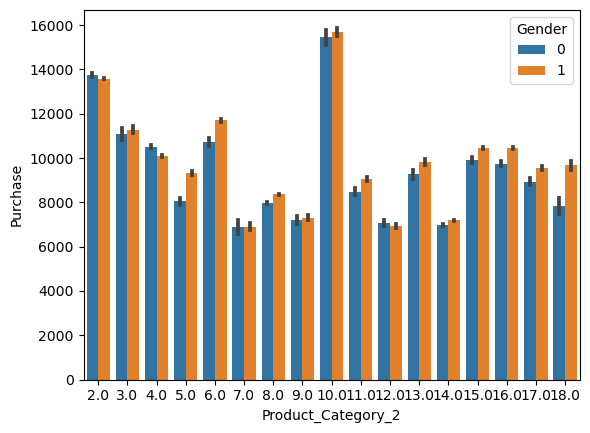

In [48]:
sns.barplot(x = df['Product_Category_2'],y = df["Purchase"],hue =df["Gender"]);

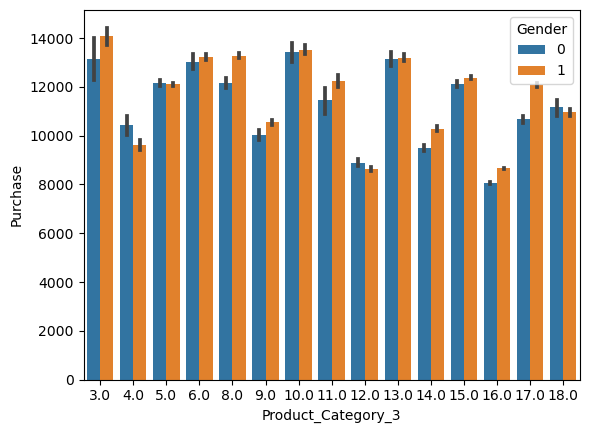

In [49]:
sns.barplot(x = df['Product_Category_3'],y = df["Purchase"],hue =df["Gender"]);

In [50]:
X = df.drop(["Purchase","Product_ID"],axis=1)
y = df["Purchase"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   B                           783667 non-null  int64  
 9   C                           783667 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 65.8 MB


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)